# Prediction of Age of Abalone

#### We predict the the number of rings for abalone test set and the age of abalone is 1.5 years plus the number of rings

## Importing Libraries

In [268]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import graphviz 
from sklearn import tree

## Importing Dataset 

In [3]:
ab=pd.read_csv('abalone.data.csv')
ab.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# Data Visualisation

In [26]:
ab.isnull().values.any()

False

In [4]:
ab.shape

(4177, 9)

In [5]:
ab.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

### If we treat it as a classification problem we find that the data is biased i.e. the data for some instances is very less

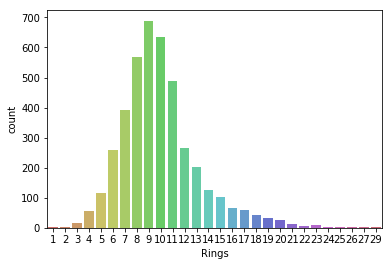

In [14]:
sns.countplot(x='Rings',data=ab,palette='hls')
plt.show()

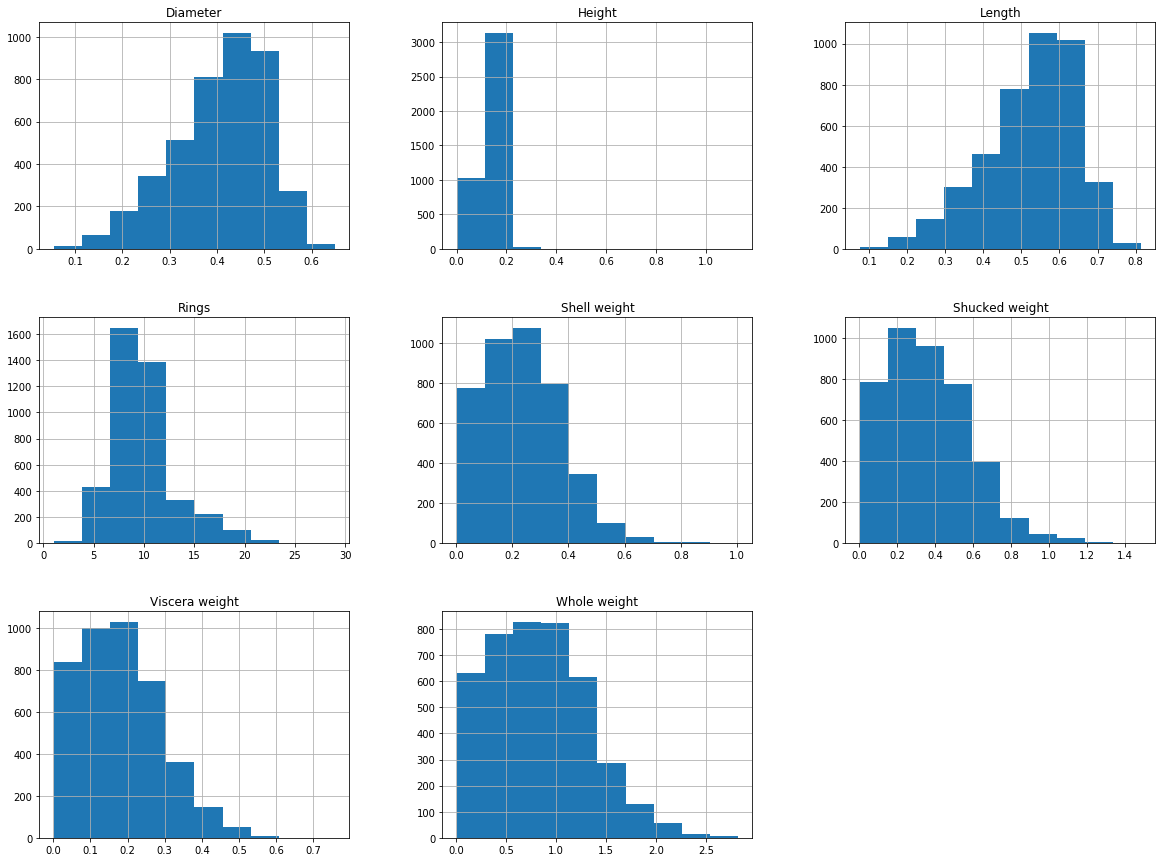

In [7]:
ab.hist(bins=10,figsize=(20,15))
plt.show()

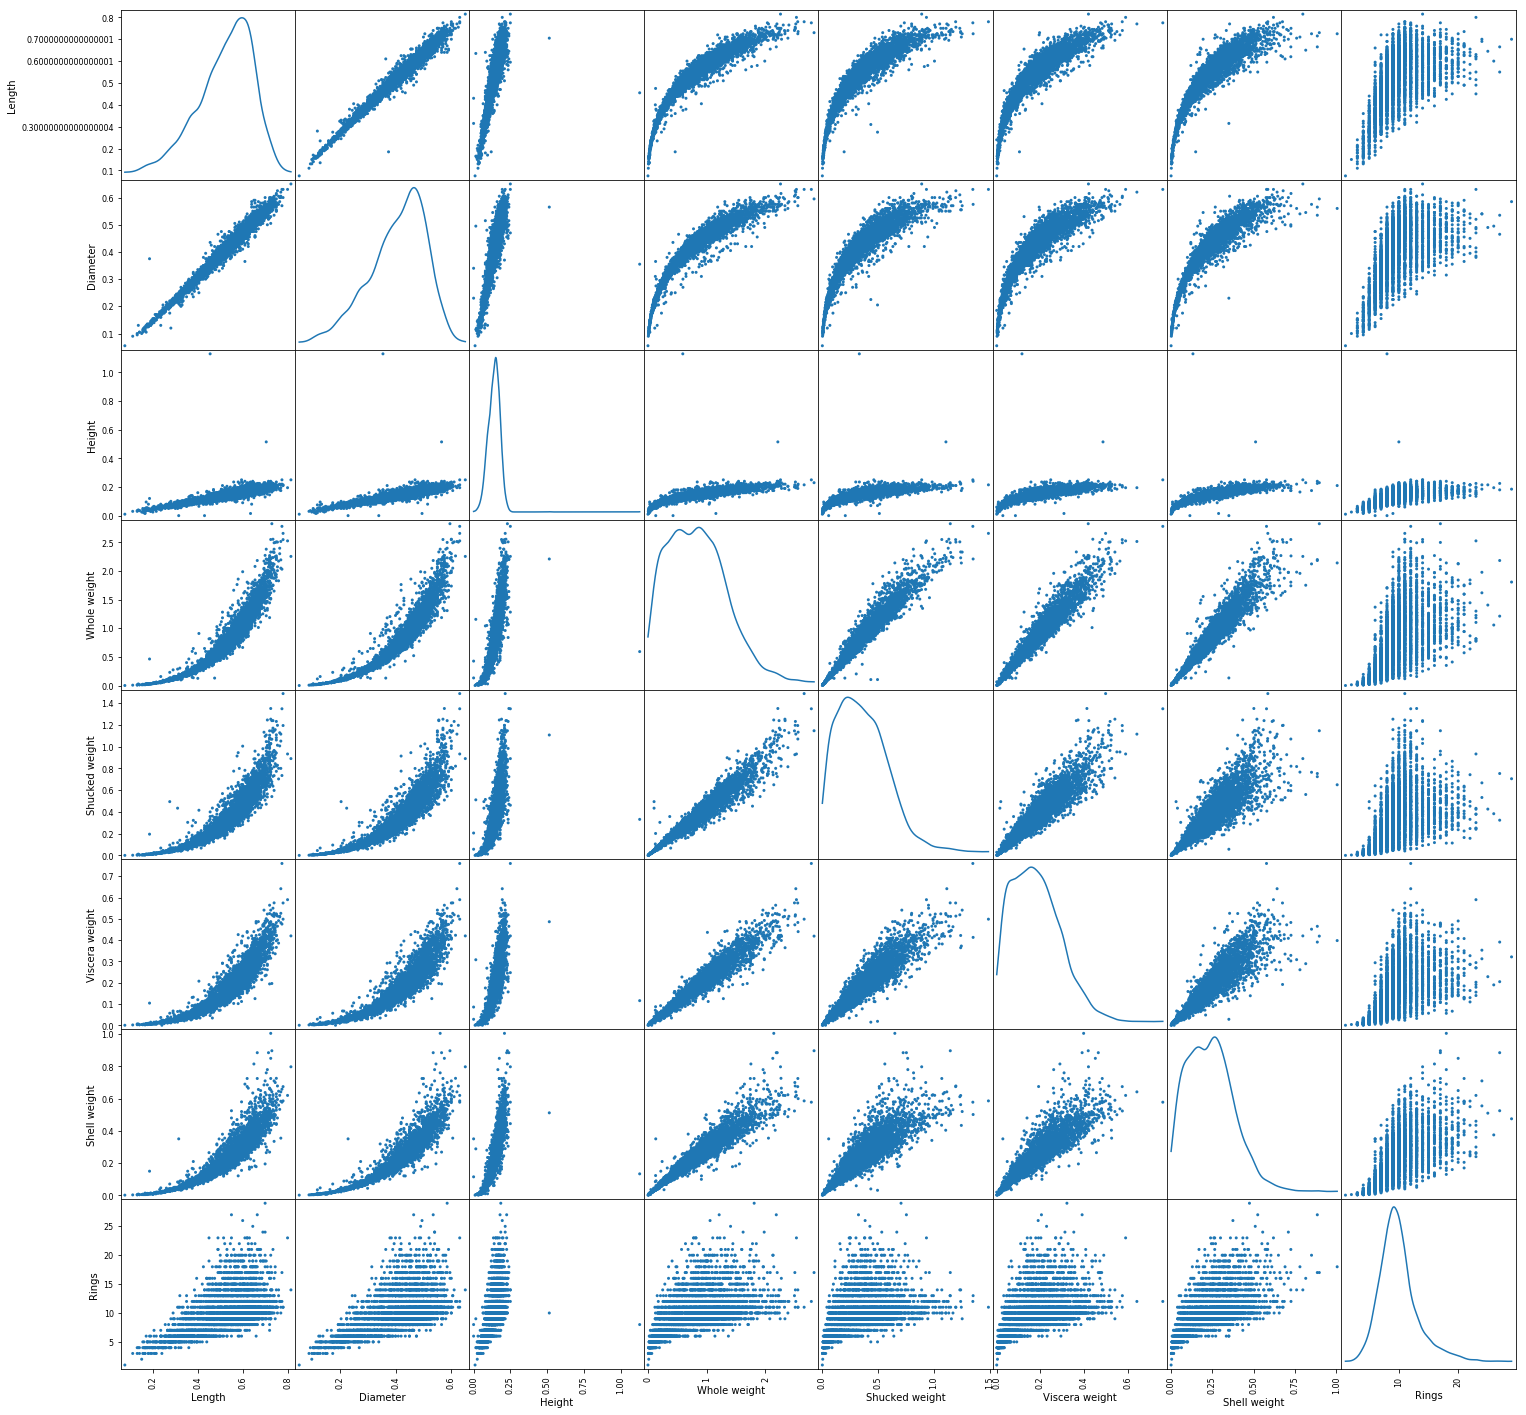

In [10]:
scatter_matrix(ab,alpha=1,figsize=(25,25),diagonal='kde')
plt.show()

In [228]:
ab.groupby('Rings').mean()

Length  Diameter    Height  Whole weight  Shucked weight  \
Rings                                                               
1      0.075000  0.055000  0.010000      0.002000        0.001000   
2      0.150000  0.100000  0.025000      0.015000        0.004500   
3      0.176000  0.128667  0.041667      0.028400        0.011767   
4      0.221491  0.161579  0.053947      0.059605        0.024719   
5      0.285739  0.210696  0.069913      0.125500        0.061696   
6      0.369363  0.278861  0.091776      0.273174        0.123158   
7      0.422033  0.321535  0.105921      0.397386        0.182657   
8      0.498776  0.384798  0.128556      0.640753        0.293773   
9      0.546865  0.425218  0.142721      0.852013        0.387938   
10     0.574629  0.449290  0.154093      1.008748        0.447217   
11     0.599374  0.470595  0.161253      1.142559        0.503977   
12     0.589457  0.462434  0.161292      1.102904        0.472781   
13     0.578892  0.456453  0.160887      1.075453        0.434638   
14     0.580198  0.458294  0.163571      1.079992        0.427190   
15     0.575728  0.456262  0.161359      1.040951        0.402471   
16     0.587537  0.468433  0.171866      1.133388        0.421716   
17     0.601034  0.475345  0.173966      1.234328        0.467052   
18     0.596071  0.471310  0.171548      1.194333        0.446833   
19     0.595625  0.470781  0.170313      1.166797        0.440625   
20     0.603654  0.482308  0.173846      1.251750        0.458115   
21     0.618214  0.485357  0.171071      1.250607        0.447464   
22     0.595000  0.472500  0.189167      1.221250        0.405000   
23     0.587222  0.463889  0.172778      1.170389        0.399444   
24     0.695000  0.540000  0.200000      1.798750        0.600250   
25     0.645000  0.490000  0.215000      1.406000        0.426500   
26     0.600000  0.495000  0.195000      1.057500        0.384000   
27     0.607500  0.500000  0.202500      1.698000        0.539000   
29     0.700000  0.585000  0.185000      1.807500        0.705500   

       Viscera weight  Shell weight  
Rings                                
1            0.000500      0.001500  
2            0.004000      0.005000  
3            0.006267      0.008933  
4            0.012956      0.018000  
5            0.027330      0.036770  
6            0.058371      0.078388  
7            0.085899      0.111648  
8            0.138502      0.178609  
9            0.187803      0.236509  
10           0.223128      0.282976  
11           0.252393      0.319866  
12           0.239575      0.321157  
13           0.235421      0.320828  
14           0.235258      0.329960  
15           0.227539      0.321650  
16           0.239769      0.377858  
17           0.251233      0.393414  
18           0.242762      0.386762  
19           0.248859      0.365312  
20           0.251135      0.425885  
21           0.246607      0.444643  
22           0.217167      0.390000  
23           0.254833      0.370556  
24           0.332750      0.632500  
25           0.228500      0.510000  
26           0.190000      0.375000  
27           0.298000      0.705000  
29           0.321500      0.475000

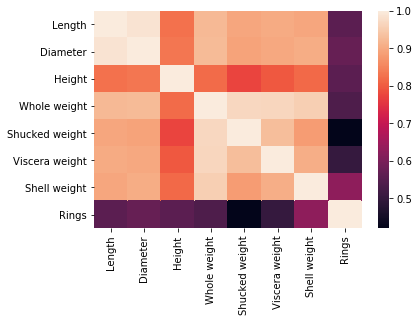

In [15]:
sns.heatmap(ab.corr())

In [11]:
ab.corr()

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

## Column Encoding for Categorical Attribute

In [39]:
sex=ab['Sex']
category = pd.get_dummies(sex)
category.head()

F  I  M
0  0  0  1
1  0  0  1
2  1  0  0
3  0  0  1
4  0  1  0

In [164]:
f=ab.drop('Sex',axis=1).join(category)

In [81]:
abb=ab.drop('Rings',axis=1)

## Data Normalisation

In [ ]:
minmax=MinMaxScaler()
feature_norm=pd.DataFrame(minmax.fit_transform(abb.drop('Sex',axis=1)),columns=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight'])
feature_norm.head()

In [84]:
feature=feature_norm.join(category)
feature=feature.join(ab['Rings'])
feature.head()

Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.513514  0.521008  0.084071      0.181335        0.150303        0.132324   
1  0.371622  0.352941  0.079646      0.079157        0.066241        0.063199   
2  0.614865  0.613445  0.119469      0.239065        0.171822        0.185648   
3  0.493243  0.521008  0.110619      0.182044        0.144250        0.149440   
4  0.344595  0.336134  0.070796      0.071897        0.059516        0.051350   

   Shell weight  F  I  M  Rings  
0      0.147982  0  0  1     15  
1      0.068261  0  0  1      7  
2      0.207773  1  0  0      9  
3      0.152965  0  0  1     10  
4      0.053313  0  1  0      7

# Dividing data into test and training set

In [85]:
shuffle_index = np.random.permutation(len(f))
shuffle_index

array([3578, 2948, 3870, ...,  244, 1745, 1287])

In [86]:
test_size = int( len(shuffle_index) * 0.2)
test_size

835

In [275]:
test_data = shuffle_index[:test_size]
train_data = shuffle_index[test_size:]
train = f.iloc[train_data]
test = f.iloc[test_data]

# Prediction using Decision Tree Regressor(without normalisation)

In [276]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [277]:
regr_1.fit(train.drop('Rings',axis=1),train['Rings'])
regr_2.fit(train.drop('Rings',axis=1),train['Rings'])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [278]:
y_1 = regr_1.predict(test.drop('Rings',axis=1))
y_2 = regr_2.predict(test.drop('Rings',axis=1))

## RMSE

In [279]:
mean_square = mean_squared_error(test['Rings'],y_1)
root_mean_square = np.sqrt(mean_square)
root_mean_square

2.616523211389726

### We find that RMSE is very less after using Decision Tree Regressor and treating it as a regression problem

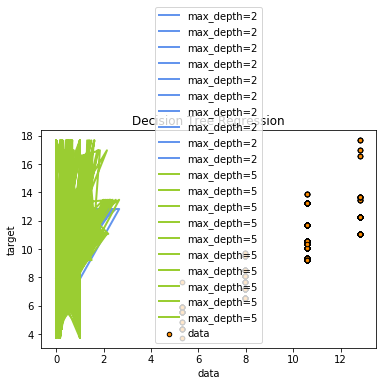

In [290]:
plt.figure()
plt.scatter(y_1,y_2,s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(test.drop('Rings',axis=1), y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(test.drop('Rings',axis=1), y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [270]:

dot_data = tree.export_graphviz(regr_1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("abalone.data") 

'abalone.data.pdf'

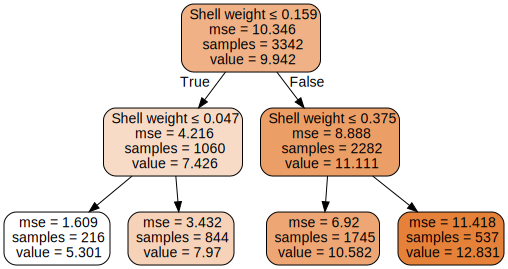

In [285]:
dot_data = tree.export_graphviz(regr_1, out_file=None,feature_names=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','M','F','I'],class_names=['9','10','8','11','7','12','6','13','14','5','15','16','17','4','18','19' ,'20','3','21','23','22','24','27','1','25','2','26','29' ],filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Prediction using Decision Tree Regressor on Normalised data

In [221]:
shuffle_index = np.random.permutation(len(feature))
test_size = int( len(shuffle_index) * 0.2)

In [222]:
test_data = shuffle_index[:test_size]
train_data = shuffle_index[test_size:]
train = feature.iloc[train_data]
test = feature.iloc[test_data]

In [223]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [248]:
regr_1.fit(train.drop('Rings',axis=1),train['Rings'])
regr_2.fit(train.drop('Rings',axis=1),train['Rings'])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [249]:
y_1 = regr_1.predict(test.drop('Rings',axis=1))
y_2 = regr_2.predict(test.drop('Rings',axis=1))

## RMSE

In [250]:
mean_square = mean_squared_error(test['Rings'],y_1)
root_mean_square = np.sqrt(mean_square)
root_mean_square

2.616523211389726

## we find not much change in RMSE even after using normalised data

# Prediction using SVM

### Now let's treat it as a classification problem where we classify the Abalone on the basis of the number of rings they possess

In [229]:
svc = svm.SVC(decision_function_shape='ovo')
svc.fit(train.drop('Rings',axis=1),train['Rings'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [230]:
predictions = svc.predict(test.drop('Rings',axis=1))
predictions

array([ 9,  9,  9,  8,  7,  8, 10,  7, 10, 10, 10,  9,  9, 10, 10,  9,  9,
        7,  7,  9,  9, 10, 10,  9,  9,  8, 10,  7,  9,  7,  8, 10,  8,  9,
       10,  8,  7,  7,  9,  9,  8,  9, 10,  7,  9,  9,  9,  9, 10,  8, 10,
        9,  8, 10, 10,  9, 10,  7,  7, 10,  9,  7,  9,  8,  8,  8, 10,  9,
        7,  9,  7, 10,  7,  9, 10,  7,  7,  7,  9,  8,  7,  9,  8, 10, 10,
        9, 10,  9,  9,  8, 10,  7, 10,  8, 10,  7,  7,  7,  8,  7, 10, 10,
        7, 10,  9,  7, 10,  9,  8,  9, 10,  9,  8,  7,  7,  7, 10,  8,  8,
        7,  8, 10, 10, 10,  8,  7, 10,  9, 10, 10,  9, 10, 10,  7,  7,  7,
       10,  9, 10,  7, 10, 10,  9, 10,  7, 10, 10, 10,  8,  7,  9,  8,  8,
        9,  9,  7,  9,  9, 10, 10,  8, 10,  9,  9, 10,  7,  9, 10,  9, 10,
        9,  8,  7,  9,  9,  8, 10, 10,  8, 10,  9,  7,  7,  7,  9, 10,  9,
        9,  7,  9,  7,  9,  9,  9, 10, 10,  7,  9, 10,  9,  7,  9, 10, 10,
        7, 10,  9,  9,  7, 10,  7, 10,  7, 10, 10,  8,  9,  7,  7,  9,  7,
        7,  9,  7, 10,  9

## Accuracy

In [231]:
accuracy_score(test['Rings'],predictions)

0.21077844311377245

### We get a very poor accuracy

### We cannot apply SMOTE to this since the number of instances for some cases is less than 6 nearest neighbours 
### i.e. (n>=6) is not satisfied 
### Therefore, we have applied Random Over Sampling#

In [233]:
sm_random = RandomOverSampler(random_state=0)

In [234]:
X_res, y_res = sm_random.fit_sample(train.drop('Rings',axis=1),train['Rings'])

In [235]:
data = pd.DataFrame(X_res,columns = train.drop('Rings',axis=1).columns)
data.head()
label = pd.DataFrame(y_res,columns = ['rings'])
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14931 entries, 0 to 14930
Data columns (total 1 columns):
rings    14931 non-null int64
dtypes: int64(1)
memory usage: 116.7 KB


In [236]:
svc = svm.SVC(decision_function_shape='rbf')
svc.fit(data,label)

/home/mohita/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='rbf', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [238]:
predictions = svc.predict(test.drop('Rings',axis=1))
predictions

array([26, 19,  7,  6,  6,  6, 11,  6, 12, 11, 23,  9,  9, 22, 24,  9, 26,
        6,  3,  9, 26, 29, 19,  9, 12,  8, 22,  6,  9,  6,  8, 22,  6, 19,
       27,  6,  6,  4, 22, 26,  8, 22, 22,  3, 22, 22,  9, 26, 29,  6, 24,
       19,  8, 22, 22,  9, 22,  6,  5, 12,  9,  5, 22,  8,  8,  6, 12, 22,
        5, 19,  7, 23,  6, 22, 22,  6,  5,  2, 22,  8,  6, 19,  6, 22, 22,
       22, 19, 22, 22,  8, 11,  6, 12,  6, 19,  6,  2,  6,  8,  5, 19, 29,
        5, 22, 19,  5, 19,  7, 17,  9, 26, 19,  8,  7,  6,  6, 12,  8,  8,
        6,  8, 12, 11, 12,  8,  7, 11,  9, 29, 12,  9, 12, 22,  4,  6,  4,
       23, 26, 23,  5, 12, 12, 26, 11,  7, 11, 19, 24, 17,  6, 26,  8,  8,
        7, 19,  6,  9, 22, 12, 26,  6, 11, 26, 26, 22,  5, 22, 29, 22, 26,
        9,  6,  6, 19, 22,  8, 24, 12,  8, 24,  7,  7,  5,  5,  9, 29, 19,
       26,  5, 19,  4, 12,  9, 19, 22, 22,  5, 26, 29, 22,  4, 26, 26, 22,
        4, 24, 22, 22,  4, 22,  6, 22,  6, 12, 26,  6, 22,  6,  6, 19,  5,
        7, 26,  6, 22,  9

## Accuracy

In [239]:
accuracy_score(predictions,test['Rings'])

0.11377245508982035

### here we find that accuracy is reduced more

## We find similar results i.e. poor accuracy using Decision Tree Classifier also

In [241]:
classifier = DecisionTreeClassifier()  
classifier.fit(data,label)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [242]:
pred = classifier.predict(test.drop('Rings',axis=1)) 

## Accuracy 

In [243]:
accuracy_score(test['Rings'], pred)

0.17604790419161676

In [271]:

dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("abalone.dataa") 

'abalone.dataa.pdf'

In [286]:
dot_data = tree.export_graphviz(classifier, out_file=None,feature_names=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','M','F','I'],class_names=['9','10','8','11','7','12','6','13','14','5','15','16','17','4','18','19' ,'20','3','21','23','22','24','27','1','25','2','26','29' ],filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Poor accuracy again

# Using Linear Regression

In [245]:
lin_reg = LinearRegression()
lin_reg.fit(train.drop(['Rings'],axis=1),train['Rings'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [246]:
prediction = lin_reg.predict(test.drop(['Rings'],axis=1))

## RMSE

In [247]:
mean_square = mean_squared_error(test['Rings'],prediction)
root_mean_square = np.sqrt(mean_square)
root_mean_square

2.1810406130789484

# Polynomial Regression

In [253]:
X = train.drop(['Rings'],axis=1)
vector = train['Rings']
predict= test.drop(['Rings'],axis=1)

In [254]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

In [255]:
clf = linear_model.LinearRegression()
clf.fit(X_, vector)
predict_poly=clf.predict(predict_)
predict_poly

array([10.21130839, 12.78390208,  8.29288951,  8.89561167,  8.15495005,
        8.76238719, 10.6756486 ,  8.12382975, 10.82487956,  9.1538209 ,
       11.15951243,  9.17562571,  8.3690919 , 11.87909785, 12.87566081,
        9.29629222, 12.31048289,  6.70681468,  5.44344226,  8.61554423,
       13.62997904, 11.11604777,  9.30326548,  9.97394267,  9.35480967,
        8.10015574, 12.87484446,  7.23401728,  9.84903422,  7.43098918,
        9.9892396 ,  9.4176797 ,  7.0788087 , 10.55212107, 14.51903239,
        8.45500651,  7.63169566,  5.03100291,  8.3598527 , 12.51768962,
        9.0585908 , 11.72519961, 10.90018168,  5.0943841 , 11.10330668,
       10.85579386, 10.26961222,  9.73507395, 11.95492259,  7.84101573,
       11.55665293, 10.12653819,  9.31904307, 11.25217906, 12.87905207,
        8.60101023, 11.06877604,  6.6022729 ,  5.59735957, 10.77290812,
       10.09709635,  6.20983973, 10.82650462,  8.92466441, 11.74004069,
        7.86054698,  9.61864558, 12.11124507,  6.27778712,  9.75

## RMSE

In [258]:
mean_square_poly = mean_squared_error(test['Rings'],predict_poly)
rmse_poly = np.sqrt(mean_square_poly)
rmse_poly

2.096135278194514

# We find RMSE near about 2 i.e. the approx difference between true and predicted value of no. of rings will be 2

# We conclude that Classification gives a much poorer result as compared to regression for Abalone Dataset